In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# Auswertung F43: Ramman-Spektroskopie

We measure the voltage of a Photodiode as at different angles of the .... 
There seem to be inconsistencies regarding the laser, dropping considerably in intensity.

In [2]:
angles = np.array([20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 12.5, 11.5, 12.25,  12.35, 12.15, 
                   10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 359, 358, 357, 356, 355, 354, 353, 340, 345, 347, 
                   350, 351, 350.5, 350.25, 350.6, 350.35, 351.5, 352, 349, 348, 330,100, 200, 75,50,
                   150, 275, 230, 300, 320]) # degrees
voltage = np.array([10.60, 10.44, 10.44, 10.30, 10.41, 10.27, 10.5, 9.60, 4.42, 2.65, 8.91, 
                    3.32, 7.80, 7.83, 6.46, 1.85, 1.82, 1.80, 1.79, 1.75, 1.75, 1.72, 1.73, 
                    1.67, 1.67, 1.67, 1.64, 1.57, 1.52, 1.48, 1.47, 1.46, 1.43, 8.80, 8.67, 8.46, 8.21, 
                    2.84, 5.63, 7.85, 4.15, 7.09, 1.35, 1.10, 7.98, 7.72, 6.79, 1.5, 7.10, 0.75, 5.20,
                    6.01, 1.92, 3.50, 1.29, 3.95]) # mV
# correct sign
voltage = - voltage

# set up pandas dataframe for storing data/easy sorting
data = pd.DataFrame()
data['angle'] = angles
data['voltage'] = voltage

# sort data by angle
data = data.sort_values(by='angle').reset_index(drop=True)
# wrap values above 180 to to negative, such that 359 equiv to -1
mask = data['angle'] > 180
data.loc[mask, 'angle'] = data.loc[mask, 'angle'] - 360



In [3]:
plt.scatter(data['angle'], data['voltage'])
plt.xlabel('Angle (degrees)')
plt.ylabel('Voltage (mV)')
plt.xlim(-12, -5)

(-12.0, -5.0)

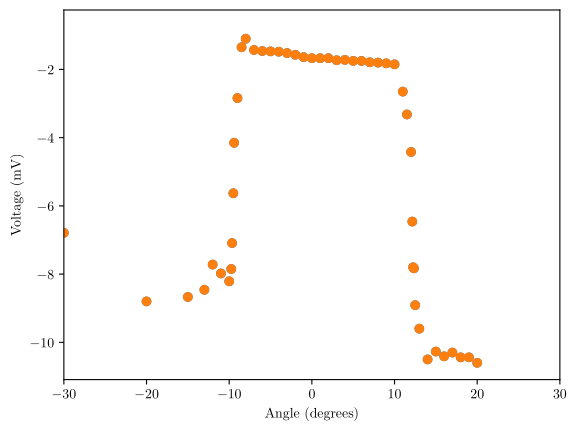

In [4]:
%matplotlib inline
plt.scatter(data['angle'], data['voltage'])
plt.xlabel('Angle (degrees)')
plt.ylabel('Voltage (mV)')
plt.xlim(-30, 30)
plt.show()

In [5]:
#we use Minuit package to fit a linear function to the measured signal
from iminuit import Minuit, cost

# looking at the first transition
mask1 = (data['angle'] > 9) & (data['angle'] < 15)

# continue with minuit somehow TODO
inx_i = 40
inx_f = 49
deg_fit = data["angle"][inx_i: inx_f]
u_fit = data['voltage'][inx_i: inx_f]
sigma = 0.03*np.ones_like(u_fit)
#since the measured signal has no uncertainties, we assume all residual to be equally weighted, therefore sigma_y = 1
# for all data point in the data set. 

def linear(x, t0,t1):
    return t1*x +t0

chi_2 = cost.LeastSquares(deg_fit, u_fit, sigma, model = linear)
linear.errordef = Minuit.LEAST_SQUARES
minuit = Minuit(chi_2, t0=0, t1=0.58)
minuit.migrad()
t0_1, t1_1 = minuit.values['t0'], minuit.values['t1']
minuit.minos()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.448e+04 (χ²/ndof = 2068.3)│              Nfcn = 59               │
│ EDM = 6.02e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t0   │   22.72   │   0.12    │   -0.12    │    0.12    │         │         │       │
│ 1 │ t1   │   2.957   │   0.012   │   -0.012   │   0.012    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          t0           │          t1           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.12   │   0.12    │  -0.012   │   0.012   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬───────────────────┐
│    │       t0       t1 │
├────┼───────────────────┤
│ t0 │   0.0133  1.40e-3 │
│ t1 │  1.40e-3 0.000149 │
└────┴───────────────────┘

In [6]:
inx_i1 = 10
inx_f1 = 20
deg_fit = data["angle"][inx_i1: inx_f1]
u_fit = data['voltage'][inx_i1: inx_f1]
sigma = 0.03*np.ones_like(u_fit)
#since the measured signal has no uncertainties, we assume all residual to be equally weighted, therefore sigma_y = 1
# for all data point in the data set. 

def linear(x, t0,t1):
    return t1*x +t0

chi_2 = cost.LeastSquares(deg_fit, u_fit, sigma, model = linear)
linear.errordef = Minuit.LEAST_SQUARES
minuit = Minuit(chi_2, t0=0, t1=0.58)
minuit.migrad()
t0_2, t1_2 = minuit.values['t0'], minuit.values['t1']
minuit.minos()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.347e+04 (χ²/ndof = 1683.6)│              Nfcn = 63               │
│ EDM = 9.91e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t0   │   25.36   │   0.11    │   -0.11    │    0.11    │         │         │       │
│ 1 │ t1   │  -2.624   │   0.009   │   -0.009   │   0.009    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          t0           │          t1           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.11   │   0.11    │  -0.009   │   0.009   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬───────────────────┐
│    │       t0       t1 │
├────┼───────────────────┤
│ t0 │   0.0124 -1.02e-3 │
│ t1 │ -1.02e-3 8.45e-05 │
└────┴───────────────────┘

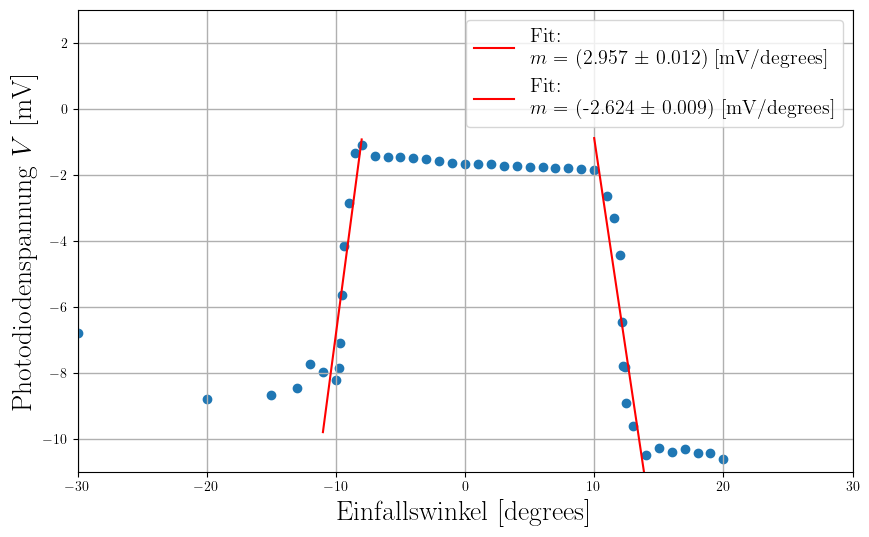

In [7]:
fig,ax = plt.subplots(figsize = (10, 6))
plt.grid(visible = True, which = 'major', linewidth=1.0)
plt.grid(visible = True, which = 'minor',linestyle = '--', linewidth=0.8)

plt.scatter(data['angle'], data['voltage'])
plt.plot(data['angle'][inx_i:inx_f],linear(data['angle'][inx_i:inx_f], t0_1, t1_1), color = 'red',
        label = 'Fit: \n $m$ = ({:.3f} $\pm$ 0.012) [mV/degrees]'.format(t1_1))
plt.plot(data['angle'][inx_i1:inx_f1],linear(data['angle'][inx_i1:inx_f1], t0_2, t1_2), color = 'red', 
        label = 'Fit: \n $m$ = ({:.3f} $\pm$ 0.009) [mV/degrees]'.format(t1_2))
plt.xlabel('Einfallswinkel [degrees]', fontsize = 20)
plt.ylabel('Photodiodenspannung $V$ [mV]', fontsize = 20)
plt.legend(fontsize='x-large', loc = 'best')
plt.xlim(-30, 30)
plt.ylim(-11,3)
plt.show()

As a next step we meuarese the voltace characteristic of the Photomultiplier. For this purpouse, we pump vacuum into the gas-cell and vary the applied voltage, i.e. current, and measure the counts for three minuts. We note the mean value of the measured counts and their standart deviation. During the measurements, the preasure of the cell is $p = (30\pm 5)$ mbar. 

In [8]:
u_in = np.array([1299, 1349,1400,1450,1500,1549,1600,1650,1699,1751,1801,1850,1900,1950,2000]) #V
i_in = np.array([.095, 0.099,0.102,.106,.110,.113,0.117,.120,.124,.128,.131,.135,.139,.142,.146,0.136]) #mA
count = np.array([0,0,0,0.10,0.5,2.30,4.0,6.60,24.90,95.90,222.20,380.70,1319.20,1683.6,969])
dcount= np.array([0,0,0,0.32,0.71,2.0,1.94,2.17,4.58,7.87,14.19,22.76,46.38,37.05,22.44]) #
np.sort(u_in)
np.sort(i_in)


array([0.095, 0.099, 0.102, 0.106, 0.11 , 0.113, 0.117, 0.12 , 0.124,
       0.128, 0.131, 0.135, 0.136, 0.139, 0.142, 0.146])

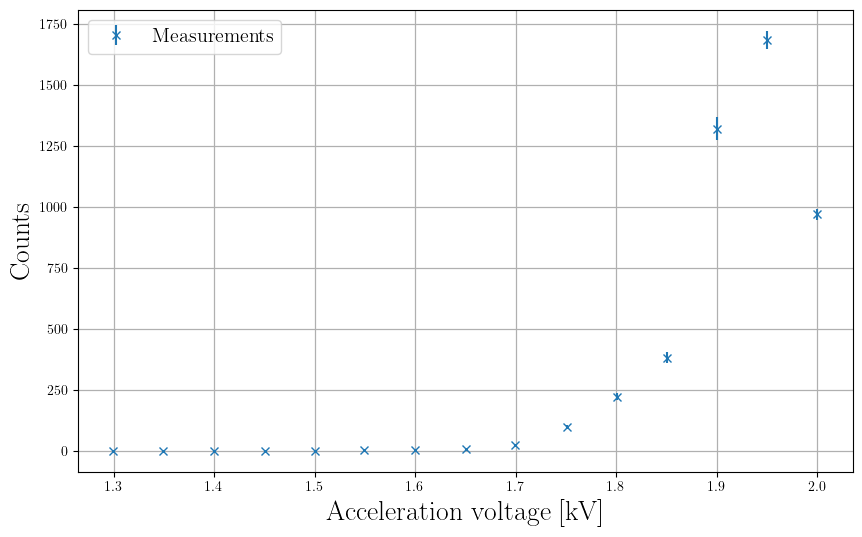

In [9]:
fig,ax = plt.subplots(figsize = (10, 6))
plt.grid(visible = True, which = 'major', linewidth=0.9)
plt.grid(visible = True, which = 'minor',linestyle = '--', linewidth=0.8)
plt.errorbar(u_in/1000, count, dcount, label="Measurements", linestyle = 'None', fmt='x')
plt.xlabel('Acceleration voltage [kV]', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.legend(fontsize='x-large', loc = 'best')
plt.show()

From the last three measurement we could notice strong deviations from the expected shape of the voltage characteristics. After a carefule look at the laser, our tutor could determine that the laser had major issues. For this reason the next parts of the experiment will be studied with old measurements. 

We start by plotting the current characteristic. 

In [10]:
U3=np.array([1500,1550,1600,1650,1700,1750,1800,1850,1900,1950,2000,2050])#V
U3_err=np.ones(len(U3))*0.5#V
Rate=np.array([3.22,2.60,8.30,18.90,145.6,1822.1,9693.6,25885,
    51397.6,78234.1,101675.8,118372.7])
Rate_err=np.array([1.66,1.51,2.31,3.45,14.57,37.54,82.43,193.9,184.92,
  409.37,327.07,473.9])

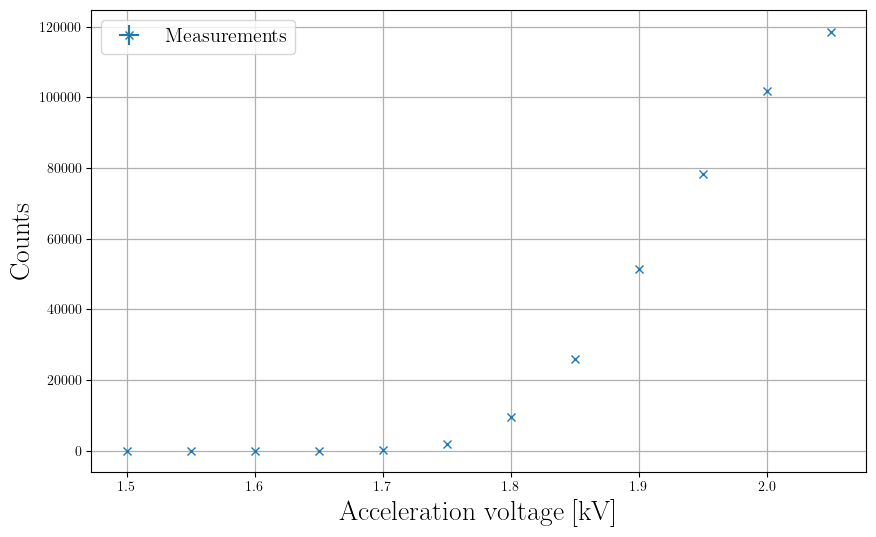

In [11]:
fig,ax = plt.subplots(figsize = (10, 6))
plt.grid(visible = True, which = 'major', linewidth=0.9)
plt.grid(visible = True, which = 'minor',linestyle = '--', linewidth=0.8)
plt.errorbar(U3/1000, Rate, xerr = U3_err/1000, yerr=Rate_err, label="Measurements", linestyle = 'None', fmt='x')
plt.xlabel('Acceleration voltage [kV]', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.legend(fontsize='x-large', loc = 'best')
plt.show()

From the response of the Photomultiplier we try to find a 'good' accelearation voltage. For this we choose a voltage, for which the change in count is maximised, ie. the strongest gradient of the curve around $\left(1925 \pm10\right)V$

### Deuterium Measurements

In [162]:
# importing deuterium data
D2_data = pd.read_csv("D2.txt", sep='\t', decimal=',', header=None)
D2_Underground_data = pd.read_csv("D2_Untergrund.txt", sep='\t',decimal=',', header=None)
D2_data.columns = ["a", "b", "wavelength", "counts"]
D2_Underground_data.columns = ["a", "b", "wavelength", "counts"]

D2_data["wavenumber"] = 1/D2_data["wavelength"]
D2_Underground_data["wavenumber"] = 1/D2_Underground_data["wavelength"]
# converting wavenumber to cm^-1
D2_data["wavenumber"] = D2_data["wavenumber"]*10**7
D2_Underground_data["wavenumber"] = D2_Underground_data["wavenumber"]*10**7
D2_data["count"] = D2_data["counts"] - D2_Underground_data["counts"]


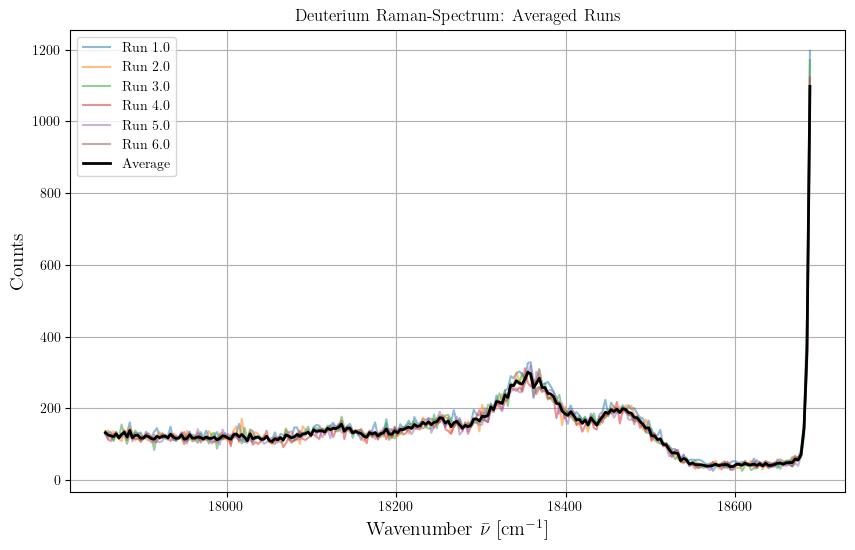

In [172]:
# Group data by wavenumber and average the counts across all 'a' values
data = D2_data.groupby("wavenumber", as_index=False)["counts"].mean()
dataEr = D2_Underground_data.groupby("wavenumber", as_index=False)["counts"].mean()

data['count'] = data['counts'] - dataEr['counts']

# Plot the individual runs and the averaged data
fig = plt.figure(figsize=(10, 6))

# Plot data for each series 'a'
for a in D2_data['a'].unique():
    mask = D2_data['a'] == a
    plt.plot(D2_data['wavenumber'][mask], D2_data['counts'][mask], alpha=0.5, label=f"Run {a}")


# Plot the averaged data
plt.plot(data["wavenumber"], data["counts"], color="black", linewidth=2, label="Average")

# Add plot details
plt.title("Deuterium Raman-Spectrum: Averaged Runs")
plt.xlabel(r"Wavenumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.legend()
plt.grid()
plt.show()


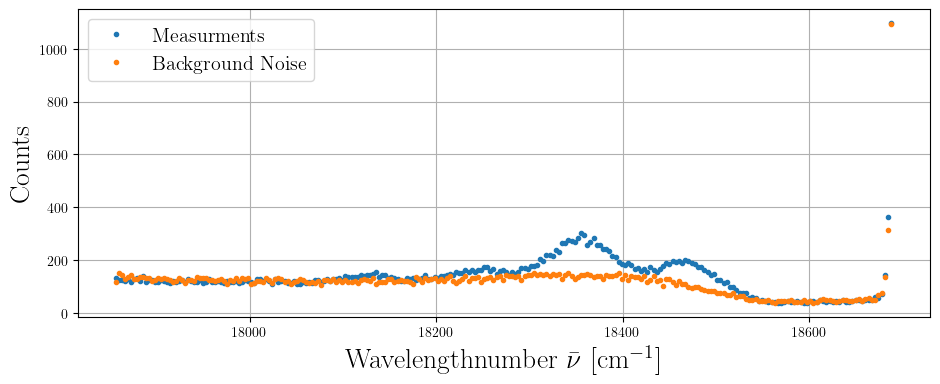

In [176]:
fig = plt.figure(figsize=(11,4))
plt.errorbar(data["wavenumber"], data["counts"],label="Measurments", 
             linestyle='None', fmt='.')
plt.errorbar(dataEr["wavenumber"], dataEr["counts"],
             label="Background Noise", linestyle='None', fmt='.')

plt.legend(fontsize='x-large', loc='best')
plt.grid()
plt.xlabel(r"Wavelengthnumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=20)
plt.ylabel("Counts ", fontsize=20)


plt.show()

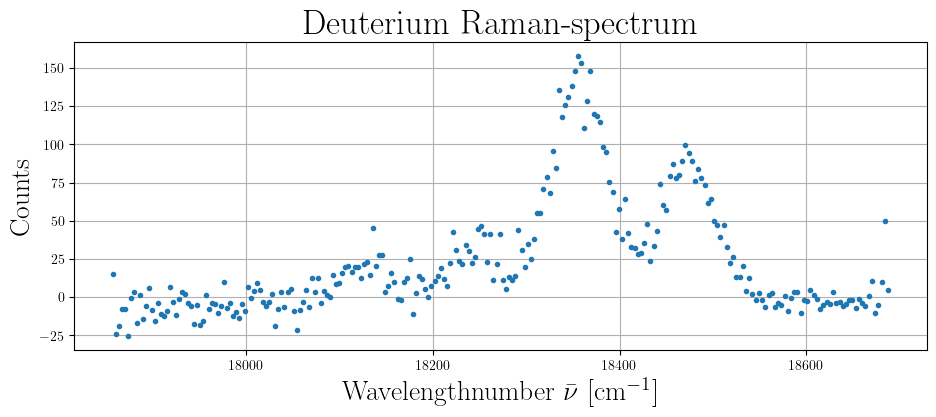

In [177]:
fig = plt.figure(figsize=(11,4))
plt.errorbar(data["wavenumber"], data["count"], 
             linestyle='None', fmt='.')

#plt.legend(fontsize='x-large', loc='best')
plt.grid()
plt.title("Deuterium Raman-spectrum", fontsize=25)
plt.xlabel(r"Wavelengthnumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=20)
plt.ylabel("Counts ", fontsize=20)

#plt.ylim(-0.10,200)
#plt.xlim(537,560)
plt.show()

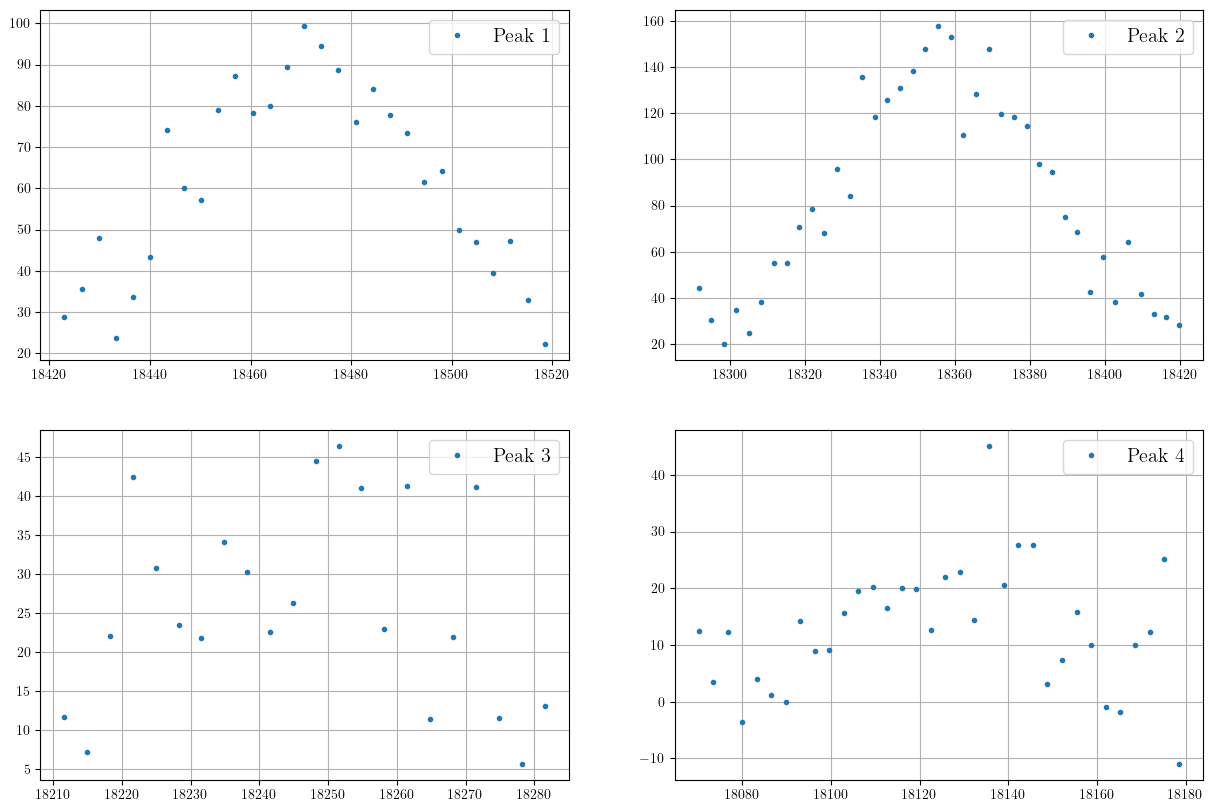

In [178]:
# defining peak ranges
peak1 = data[(data["wavenumber"] > 18422) & (data["wavenumber"] < 18520)]
peak2 = data[(data["wavenumber"] > 18290) & (data["wavenumber"] < 18422)]
peak3 = data[(data["wavenumber"] > 18210) & (data["wavenumber"] < 18283)]
peak4 = data[(data["wavenumber"] > 18070) & (data["wavenumber"] < 18180)]
# making suobplots for all of the peaks
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0,0].errorbar(peak1["wavenumber"], peak1["count"],
                    label="Peak 1", linestyle='None', fmt='.')
ax[0,1].errorbar(peak2["wavenumber"], peak2["count"],
                    label="Peak 2", linestyle='None', fmt='.')
ax[1,0].errorbar(peak3["wavenumber"], peak3["count"], 
                    label="Peak 3", linestyle='None', fmt='.')
ax[1,1].errorbar(peak4["wavenumber"], peak4["count"],
                    label="Peak 4", linestyle='None', fmt='.')
ax[0,0].legend(fontsize='x-large', loc='best')
ax[1,0].legend(fontsize='x-large', loc='best')
ax[0,1].legend(fontsize='x-large', loc='best')
ax[1,1].legend(fontsize='x-large', loc='best')
ax[0,0].grid()
ax[1,0].grid()
ax[0,1].grid()
ax[1,1].grid()

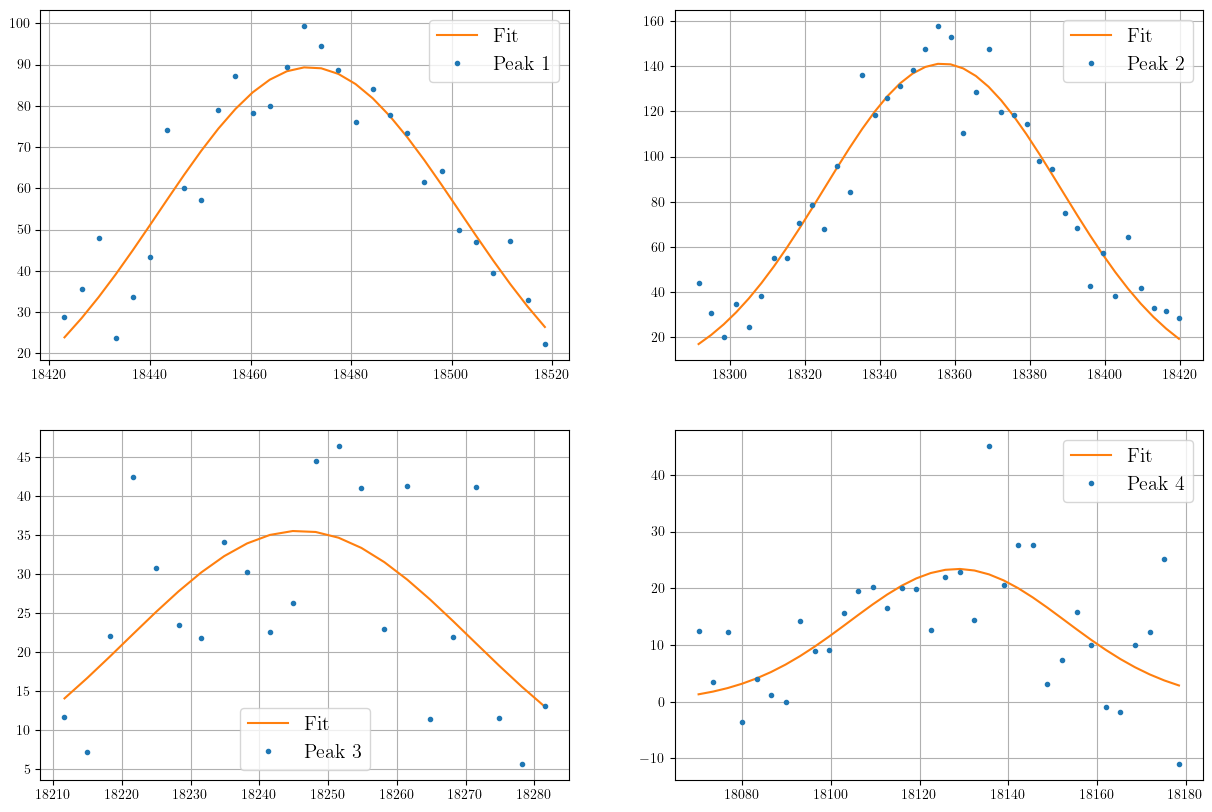

In [179]:
# fit peak1 with gaussian using skipy curve_fit
from scipy.optimize import curve_fit

def gaussian(x, a, b, c):
    return a*np.exp(-(x-b)**2/(2*c**2))

popt1, pcov1 = curve_fit(gaussian, peak1["wavenumber"], peak1["count"], p0=[100, 18470, 10])
popt2, pcov2 = curve_fit(gaussian, peak2["wavenumber"], peak2["count"], p0=[100, 18350, 10])
popt3, pcov3 = curve_fit(gaussian, peak3["wavenumber"], peak3["count"], p0=[100, 18250, 10])
popt4, pcov4 = curve_fit(gaussian, peak4["wavenumber"], peak4["count"], p0=[100, 18150, 10])

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0,0].errorbar(peak1["wavenumber"], peak1["count"],
                    label="Peak 1", linestyle='None', fmt='.')
ax[0,0].plot(peak1["wavenumber"], gaussian(peak1["wavenumber"], *popt1), label="Fit")
ax[0,1].errorbar(peak2["wavenumber"], peak2["count"],
                    label="Peak 2", linestyle='None', fmt='.')
ax[0,1].plot(peak2["wavenumber"], gaussian(peak2["wavenumber"], *popt2), label="Fit")
ax[1,0].errorbar(peak3["wavenumber"], peak3["count"], 
                    label="Peak 3", linestyle='None', fmt='.')
ax[1,0].plot(peak3["wavenumber"], gaussian(peak3["wavenumber"], *popt3), label="Fit")
ax[1,1].errorbar(peak4["wavenumber"], peak4["count"],
                    label="Peak 4", linestyle='None', fmt='.')
ax[1,1].plot(peak4["wavenumber"], gaussian(peak4["wavenumber"], *popt4), label="Fit")
ax[0,0].legend(fontsize='x-large', loc='best')
ax[1,0].legend(fontsize='x-large', loc='best')
ax[0,1].legend(fontsize='x-large', loc='best')
ax[1,1].legend(fontsize='x-large', loc='best')
ax[0,0].grid()
ax[1,0].grid()
ax[0,1].grid()
ax[1,1].grid()


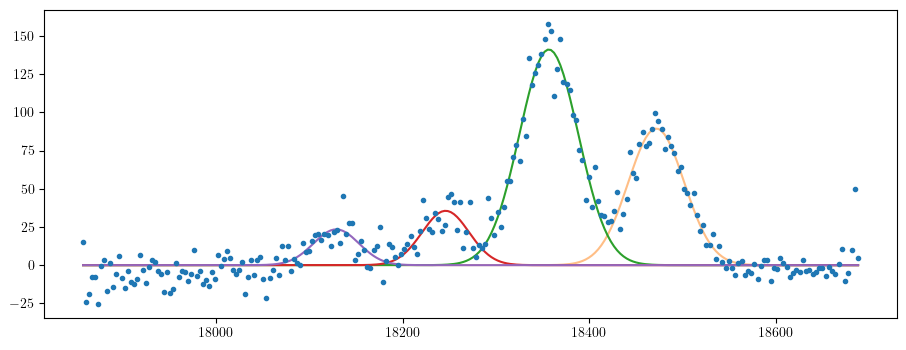

In [180]:
# plot of the entire spectrum with fits
fig = plt.figure(figsize=(11,4))
plt.errorbar(data["wavenumber"], data["count"], 
             linestyle='None', fmt='.')
plt.plot(data["wavenumber"], gaussian(data["wavenumber"], *popt1), label="Peak 1", alpha=0.5)
plt.plot(data["wavenumber"], gaussian(data["wavenumber"], *popt2), label="Peak 2")
plt.plot(data["wavenumber"], gaussian(data["wavenumber"], *popt3), label="Peak 3")
plt.plot(data["wavenumber"], gaussian(data["wavenumber"], *popt4), label="Peak 4")

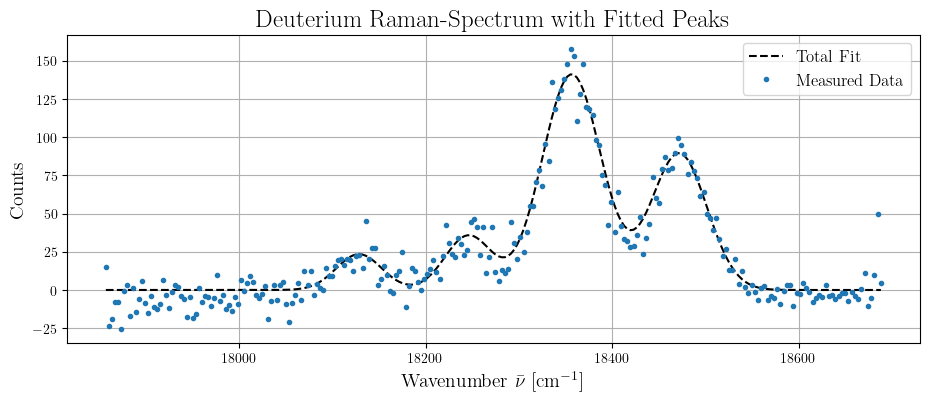

In [181]:
# Calculate the total fit by summing all the individual Gaussians
total_fit = (
    gaussian(data["wavenumber"], *popt1) +
    gaussian(data["wavenumber"], *popt2) +
    gaussian(data["wavenumber"], *popt3) +
    gaussian(data["wavenumber"], *popt4)
)

# Plot the spectrum with individual fits and the total fit
fig = plt.figure(figsize=(11, 4))
plt.errorbar(data["wavenumber"], data["count"], linestyle='None', fmt='.', label="Measured Data")

plt.plot(data["wavenumber"], total_fit, label="Total Fit", color='black', linestyle='--')

# Add legend, labels, and grid
plt.legend(fontsize='large')
plt.title("Deuterium Raman-Spectrum with Fitted Peaks", fontsize=18)
plt.xlabel(r"Wavenumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.grid()
plt.show()


In [186]:
# Extract Gaussian fit parameters for each peak
peak_info = {
    "peak": ["Peak 1", "Peak 2", "Peak 3", "Peak 4"],
    "center": [popt1[1], popt2[1], popt3[1], popt4[1]],
    "width": [popt1[2], popt2[2], popt3[2], popt4[2]],
    "intensity": [popt1[0], popt2[0], popt3[0], popt4[0]],
}


peak_df = pd.DataFrame(peak_info)
print(peak_df)


     peak        center      width   intensity
0  Peak 1  18471.694896  29.981969   89.393986
1  Peak 2  18356.578343  31.619284  141.120037
2  Peak 3  18245.861988  25.113017   35.560090
3  Peak 4  18128.604138  24.348264   23.426982


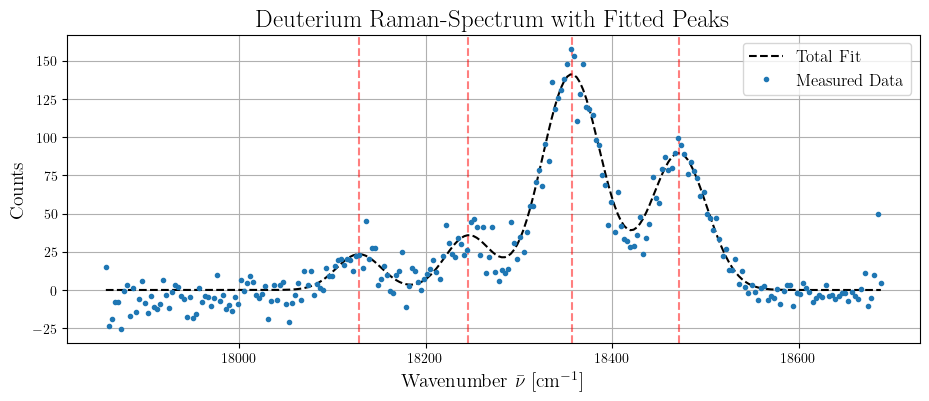

In [187]:
# vertical line for calculated center positions

fig = plt.figure(figsize=(11, 4))
plt.errorbar(data["wavenumber"], data["count"], linestyle='None', fmt='.', label="Measured Data")

plt.plot(data["wavenumber"], total_fit, label="Total Fit", color='black', linestyle='--')
# add vertical lines
for center in peak_df["center"]:
    plt.axvline(center, color='red', linestyle='--', alpha=0.5)

# Add legend, labels, and grid
plt.legend(fontsize='large')
plt.title("Deuterium Raman-Spectrum with Fitted Peaks", fontsize=18)
plt.xlabel(r"Wavenumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.grid()
plt.show()